In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [3]:
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json

# updated compilePR method so that it is actually detecting int values for parameters , this adds almost all the data that we were missing for most objects that did not have the finer parameter scan (only 1 or 2 objects has this per sample ) 

In [88]:
df = pd.read_csv("pixel_em/MV_PRJ_table.csv")
df = df.rename(columns={"MV_precision":"P [MV]",
                       "MV_recall":"R [MV]",
                       "MV_jaccard":"J [MV]"})
# df = df.drop(['thresh'],axis=1)
for mode in  ["GT","isoGT","GTLSA","isoGTLSA","basic"]:
    data =  pd.read_csv("../TileEM/pixel_em/{}_ground_truth_full_PRJ_table.csv".format(mode))
    data = data.rename(columns={"EM_precision":"P [{}]".format(mode),
                       "EM_recall":"R [{}]".format(mode),
                       "EM_jaccard":"J [{}]".format(mode),})
    df = df.merge(data)
df=df.drop_duplicates()
df.to_csv("ground_truth_experiment_refined.csv",index=None)

In [4]:
df = pd.read_csv("ground_truth_experiment_refined.csv")

In [5]:
objdf = df[(df["num_workers"]==5)&(df["sample_num"]==0)&(df["objid"]==1)]

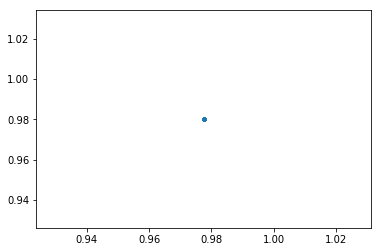

In [6]:
algo='basic'
plt.plot(objdf["P [{}]".format(algo)],objdf["R [{}]".format(algo)],'.-',label=algo)

In [7]:
# objdf[["thresh","J [basic]"]]

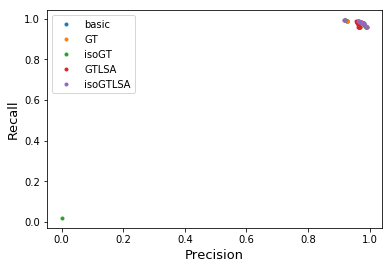

In [8]:
for algo in ['basic','GT','isoGT','GTLSA','isoGTLSA']:
    plt.plot(objdf["P [{}]".format(algo)],objdf["R [{}]".format(algo)],'.',label=algo)
plt.xlabel("Precision",fontsize=13)
plt.ylabel("Recall",fontsize=13)
plt.legend()

```
[jlee782@hilda TileEM]$ cat pixel_em/5workers_rand0/obj1/basic_EM_prj_thresh0.0.json
[0.977602559707462, 0.9801787351054079, 0.958650829224563][jlee782@hilda TileEM]$ cat pixel_em/5workers_rand0/obj1/basic_EM_prj_thresh2.json
[0.977602559707462, 0.9801787351054079, 0.958650829224563][jlee782@hilda TileEM]$ cat pixel_em/5workers_rand0/obj1/basic_EM_prj_thresh-1.8.json
[0.977602559707462, 0.9801787351054079, 0.958650829224563][jlee782@hilda TileEM]$
```

In [9]:
import pickle as pkl 

In [10]:
gt1 = pkl.load(open("pixel_em/5workers_rand0/obj5/basic_gt_est_ground_truth_mask_thresh-2.pkl"))
gt2 = pkl.load(open("pixel_em/5workers_rand0/obj5/basic_gt_est_ground_truth_mask_thresh2.pkl"))
np.where(gt1!=gt2)

(array([], dtype=int64), array([], dtype=int64))

In [11]:
gt1 = pkl.load(open("pixel_em/5workers_rand0/obj1/basic_gt_est_ground_truth_mask_thresh-2.pkl"))
gt2 = pkl.load(open("pixel_em/5workers_rand0/obj1/basic_gt_est_ground_truth_mask_thresh2.pkl"))

In [12]:
np.where(gt1!=gt2)

(array([], dtype=int64), array([], dtype=int64))

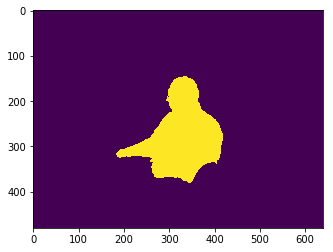

In [13]:
plt.imshow(gt2)

In [14]:
def plot_PRcurve(objid,num_worker,sample_num=0):
    objdf = df[(df["num_workers"]==num_worker)&(df["sample_num"]==sample_num)&(df["objid"]==objid)]
    plt.figure()
    for algo in ['basic','GT','isoGT','GTLSA','isoGTLSA']:
        x= objdf["P [{}]".format(algo)]
        y = objdf["R [{}]".format(algo)]
        if len(x)<=0:
            return
        sortedx, sortedy = zip(*sorted(zip(x, y)))
        plt.plot(sortedx,sortedy,'.-',label=algo)
    plt.xlabel("Precision",fontsize=13)
    plt.ylabel("Recall",fontsize=13)
    plt.legend(loc="bottom left")
    plt.title("{}worker_rand{} [obj {};N={}]".format(num_worker,sample_num,objid,len(objdf)))

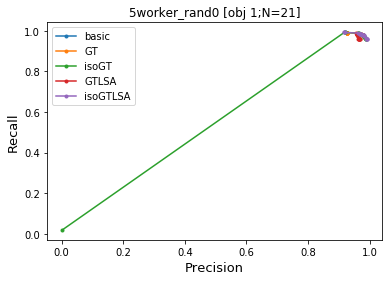

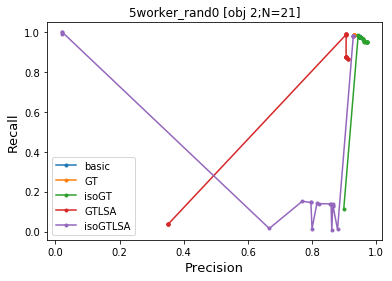

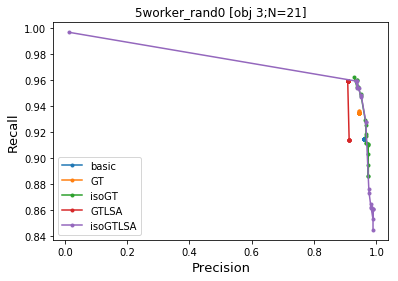

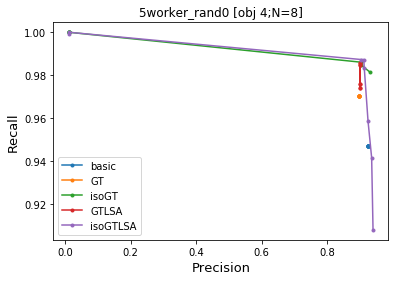

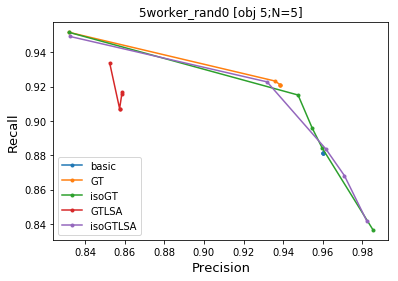

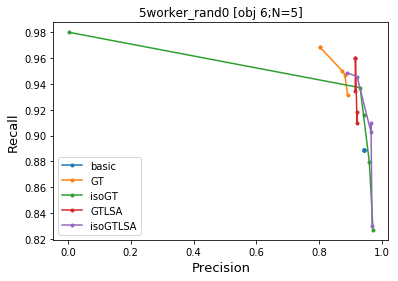

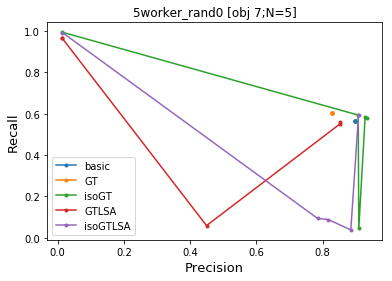

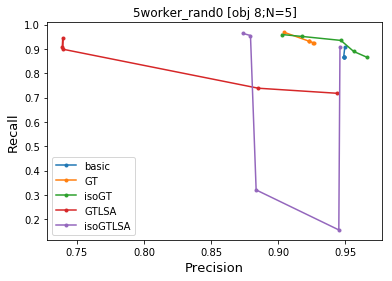

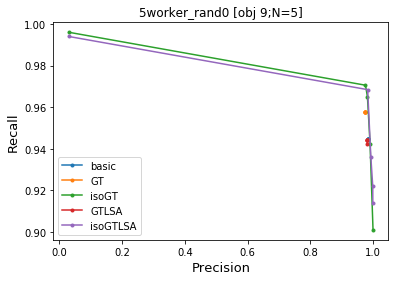

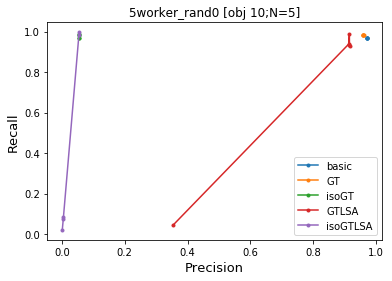

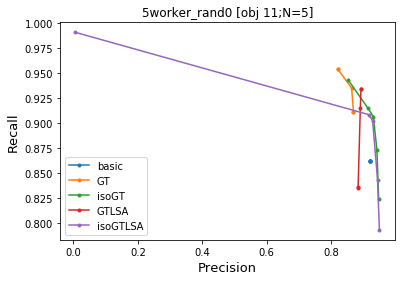

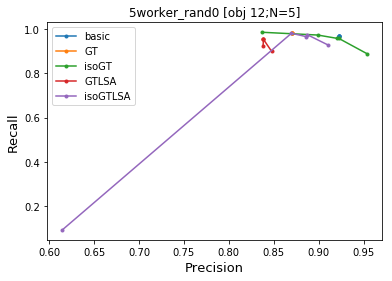

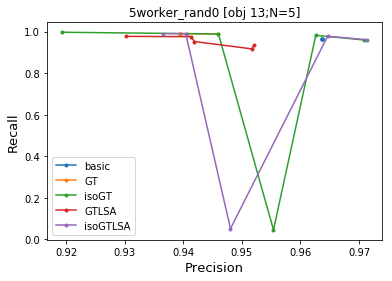

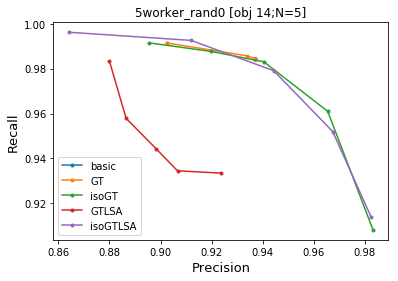

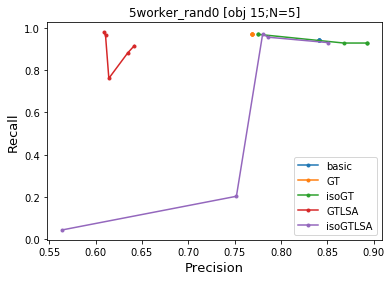

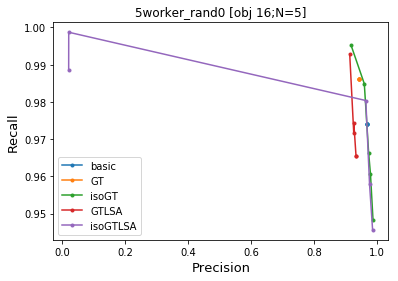

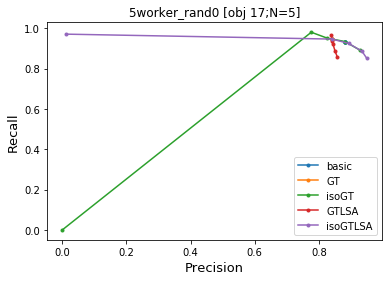

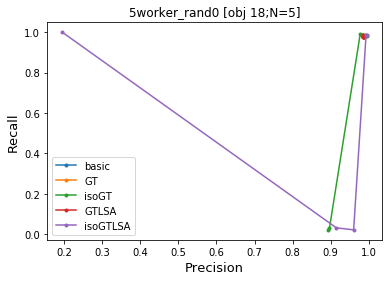

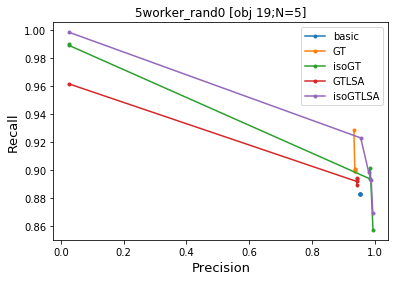

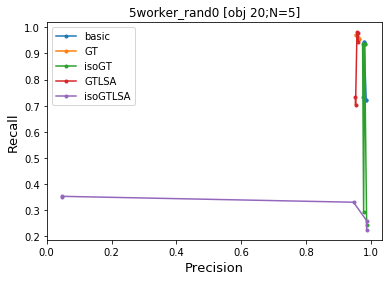

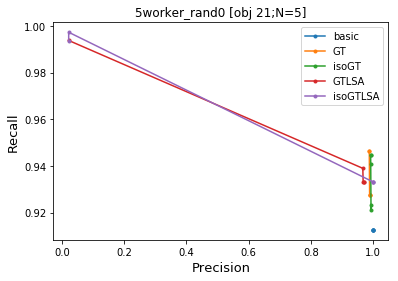

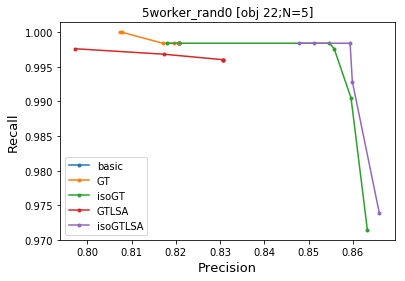

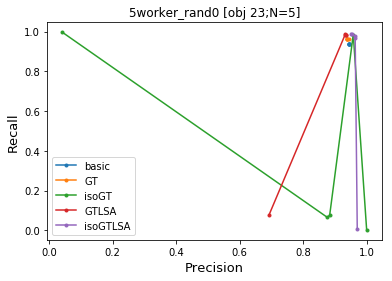

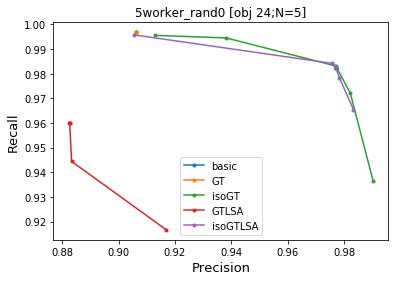

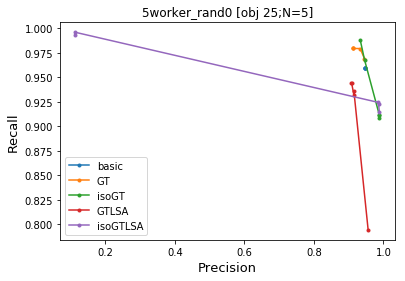

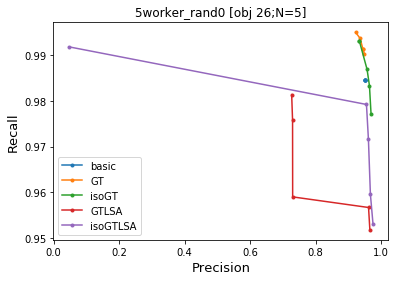

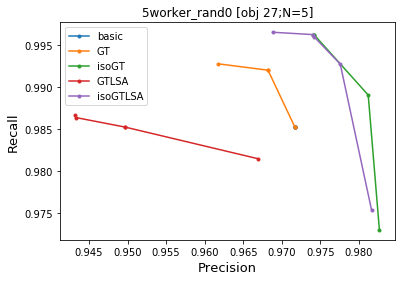

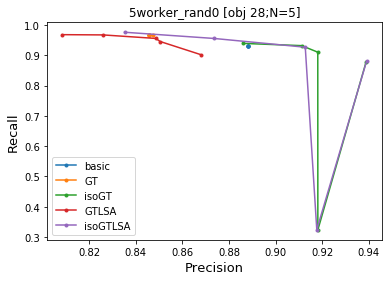

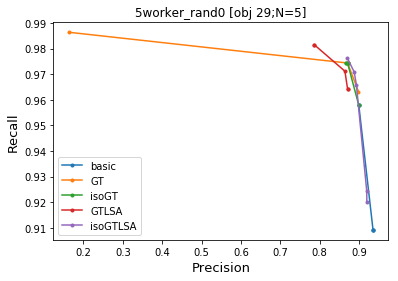

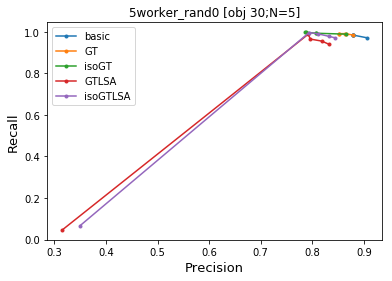

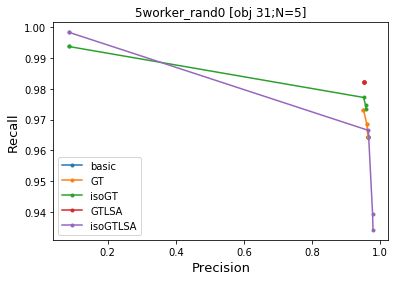

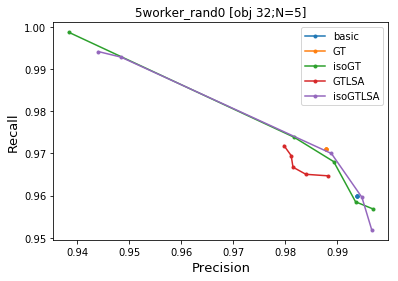

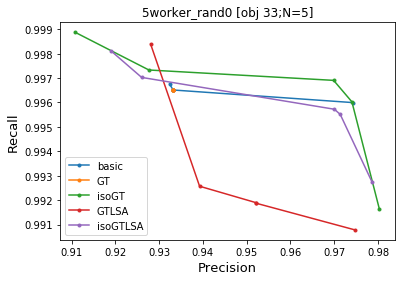

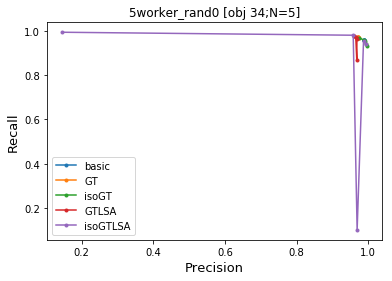

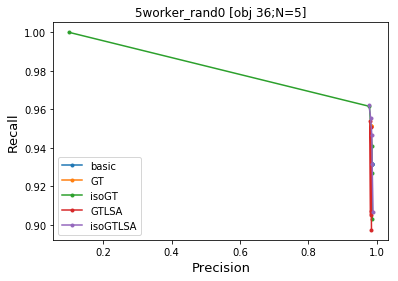

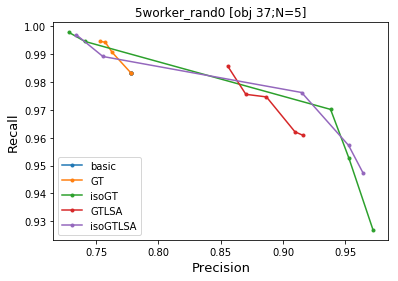

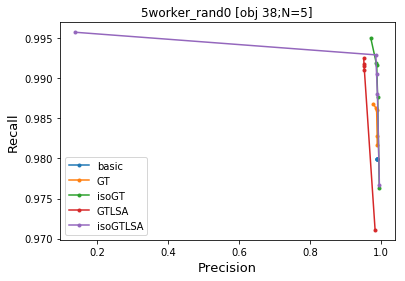

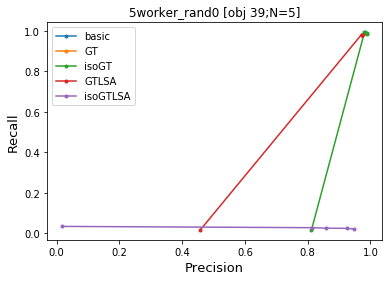

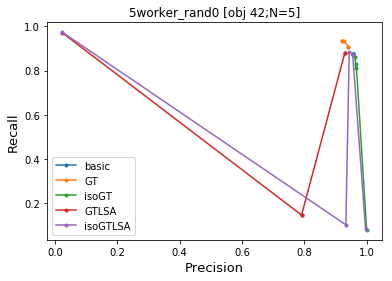

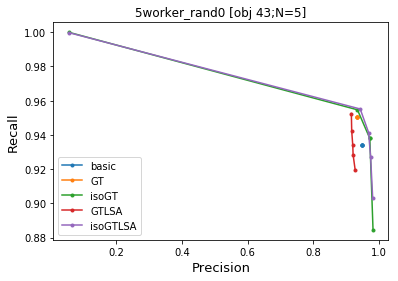

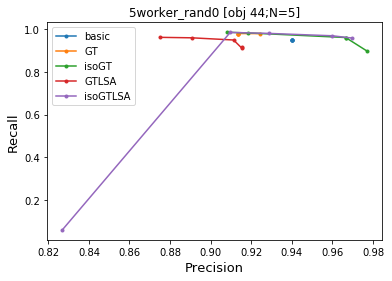

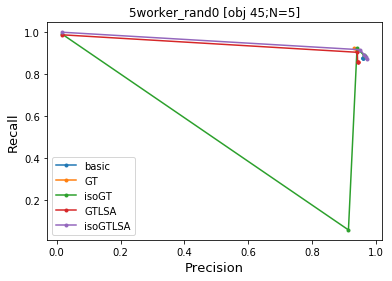

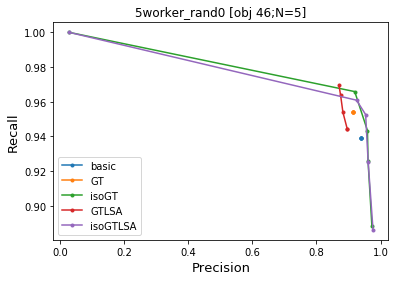

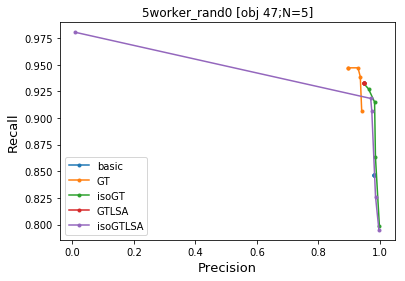

In [15]:
for i in object_lst:
    plot_PRcurve(i,5,0)

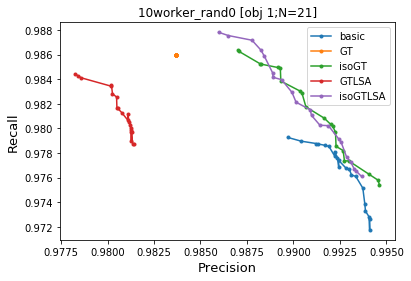

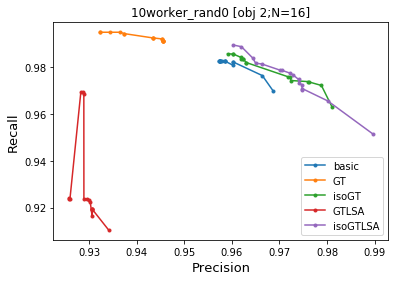

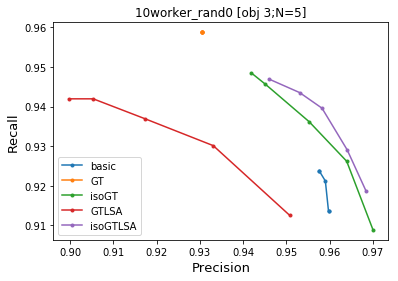

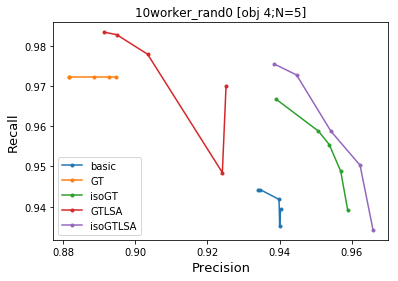

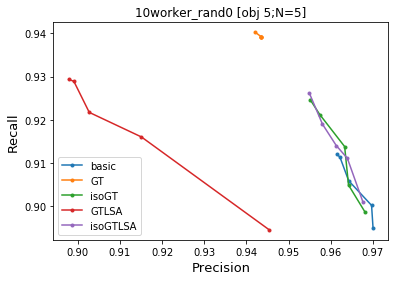

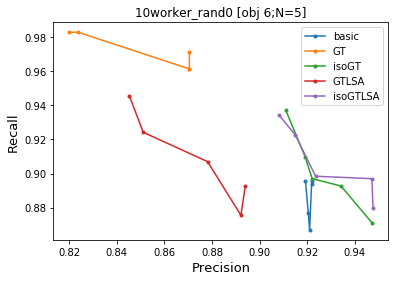

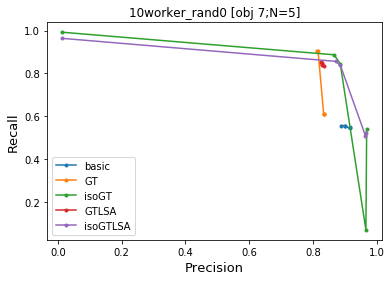

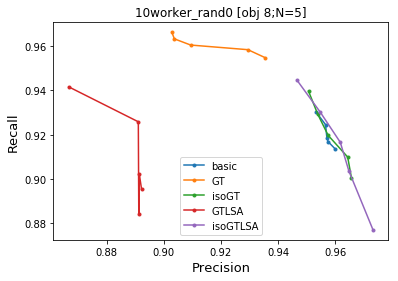

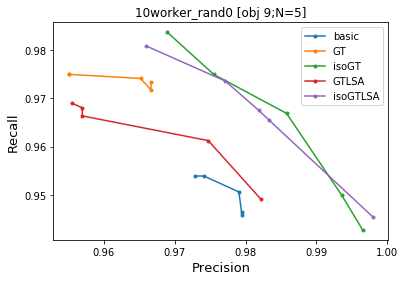

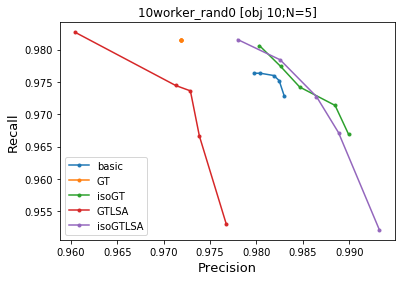

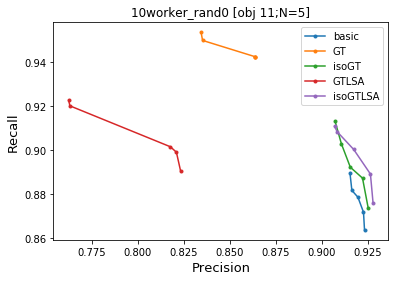

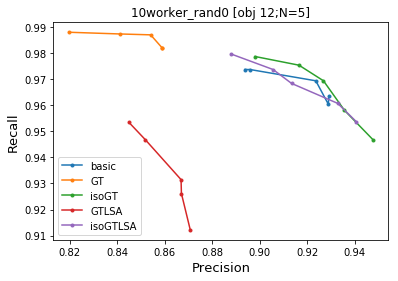

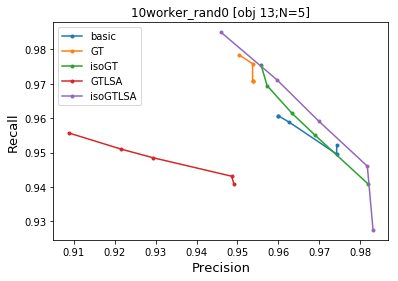

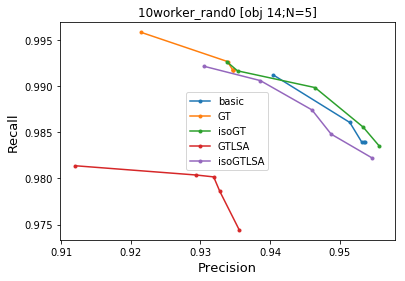

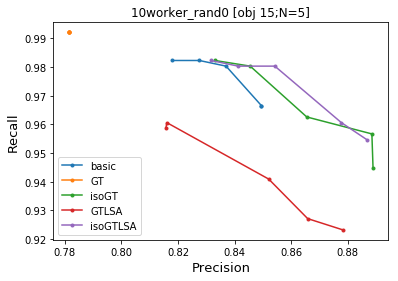

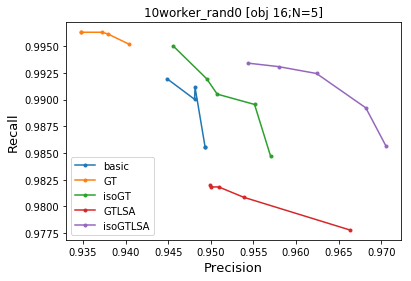

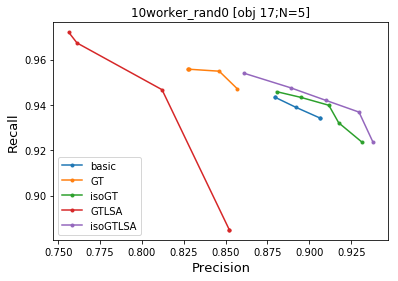

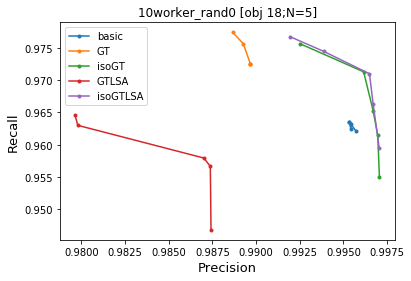

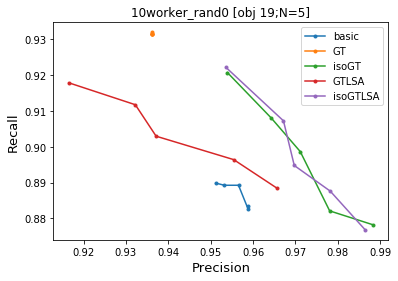

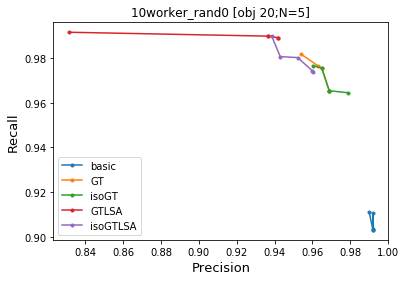

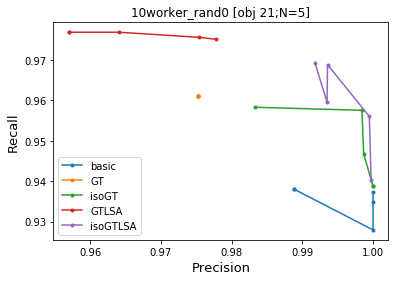

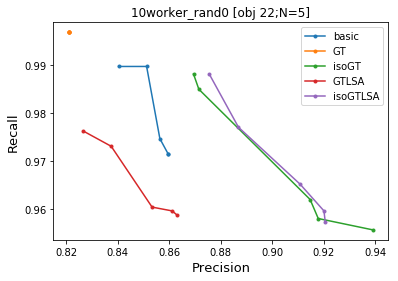

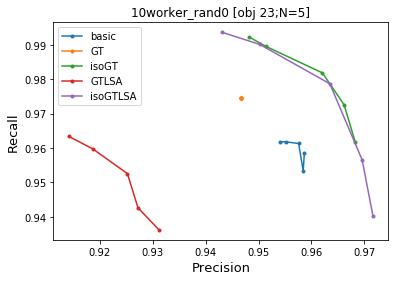

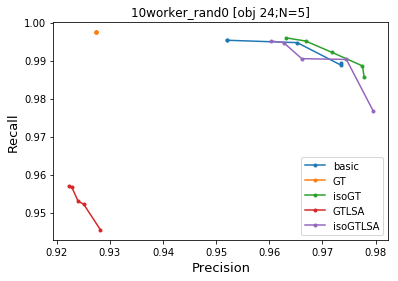

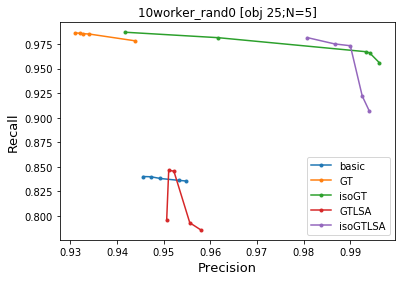

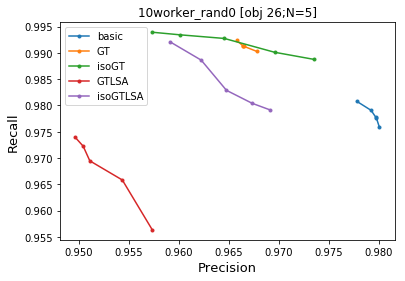

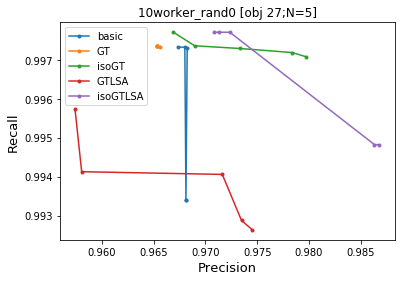

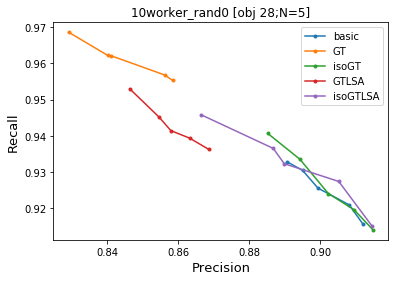

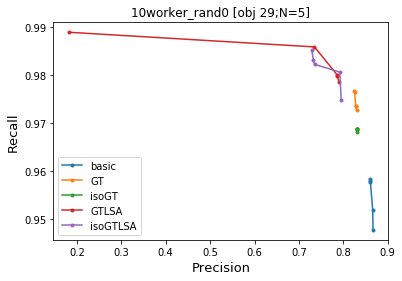

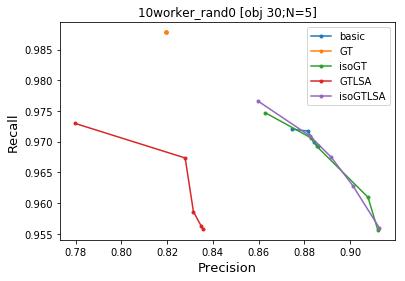

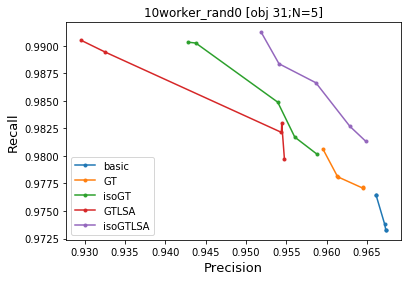

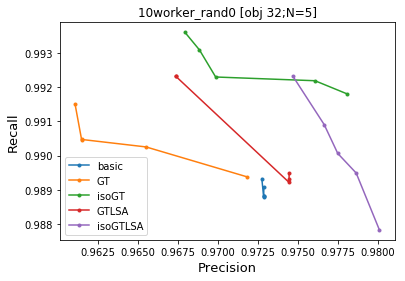

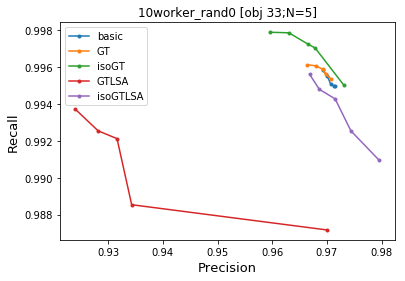

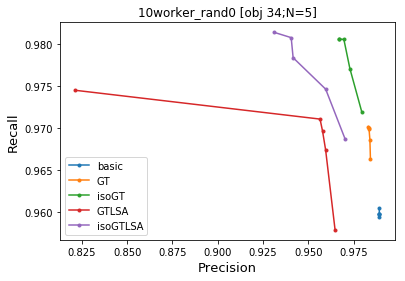

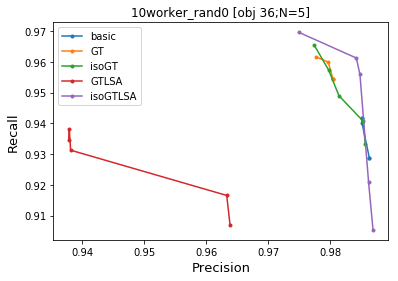

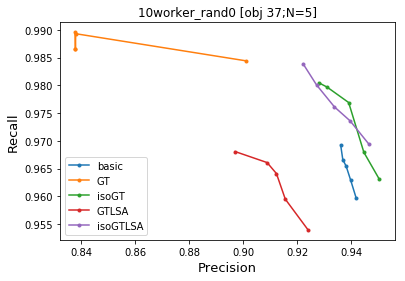

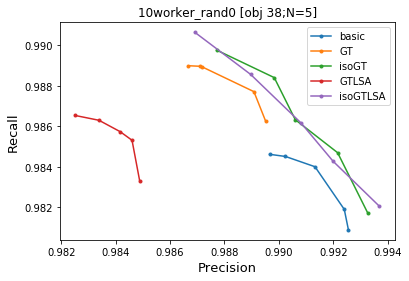

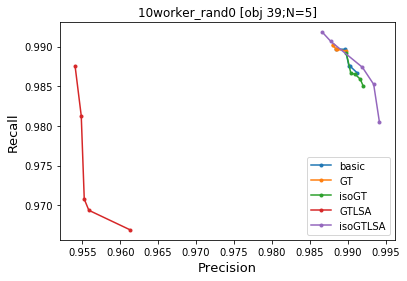

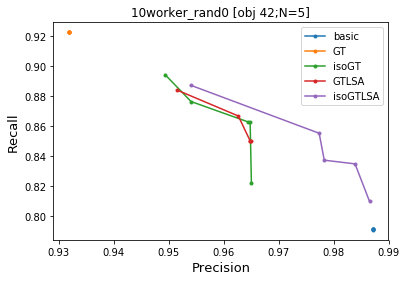

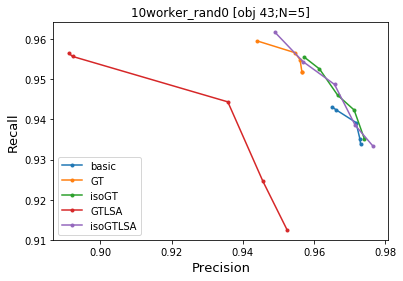

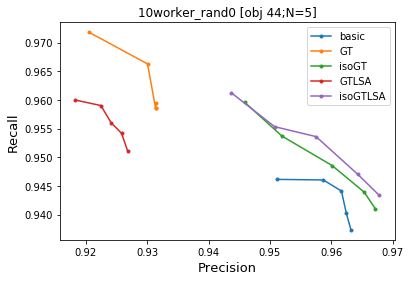

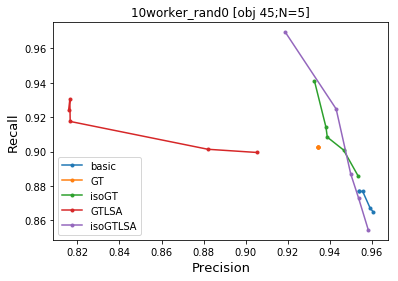

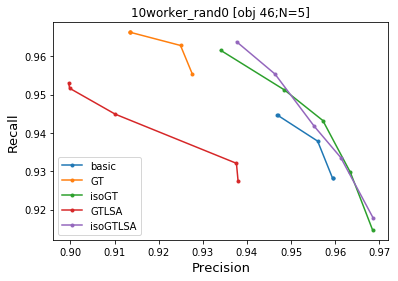

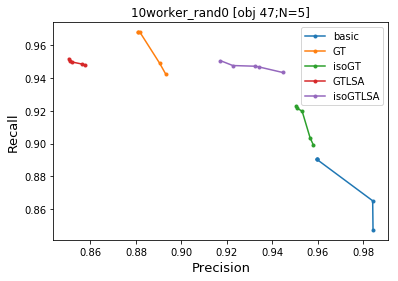

In [16]:
for i in object_lst:
    plot_PRcurve(i,10,0)

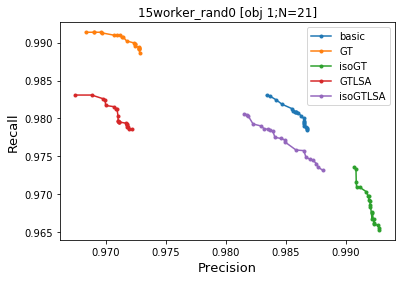

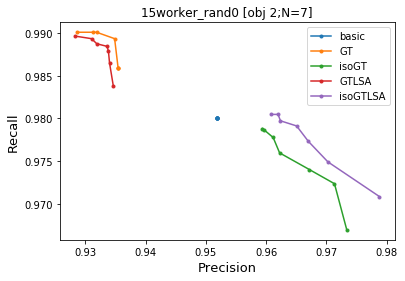

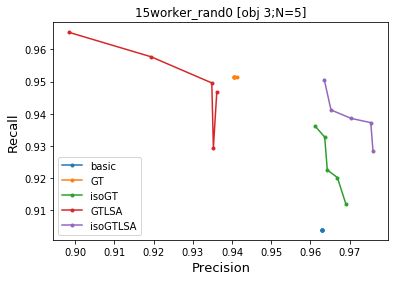

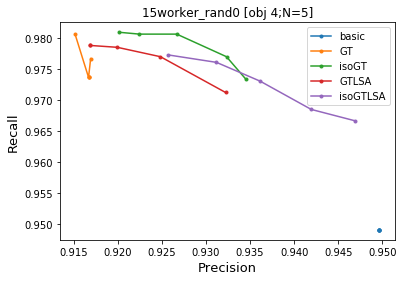

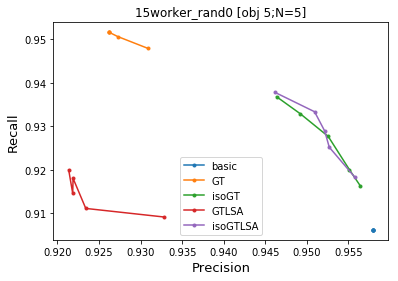

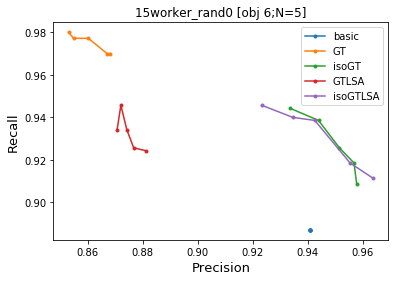

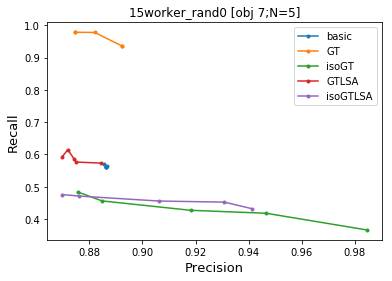

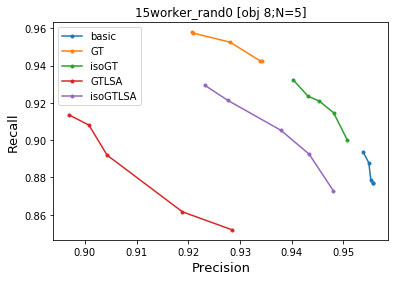

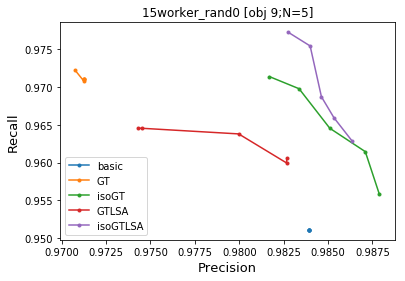

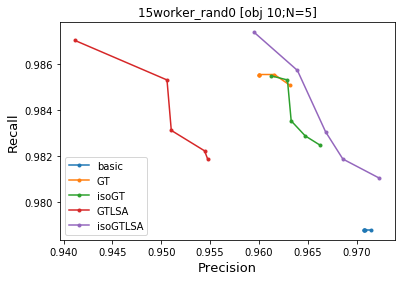

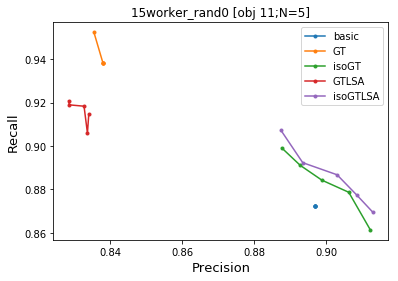

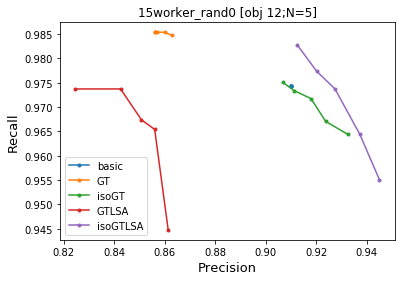

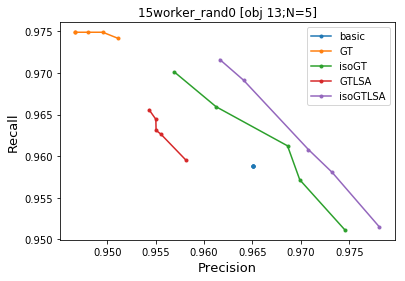

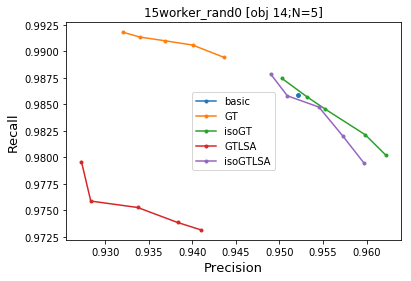

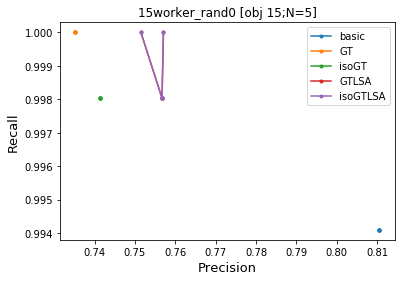

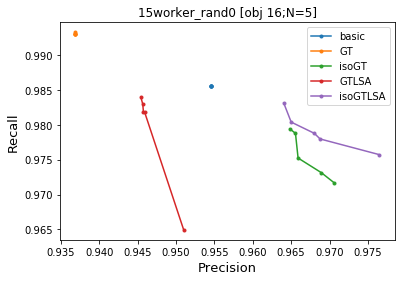

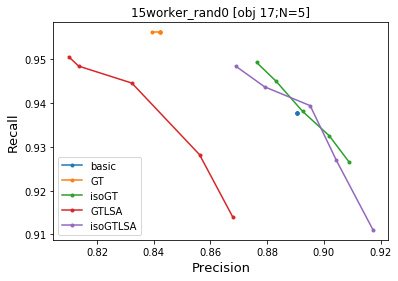

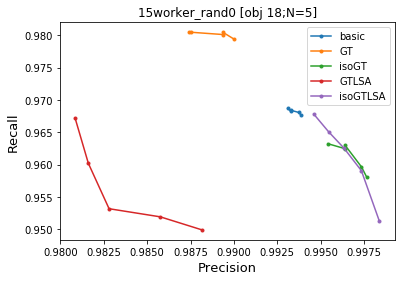

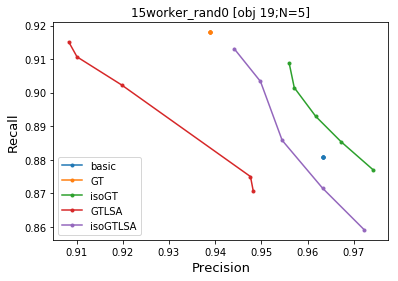

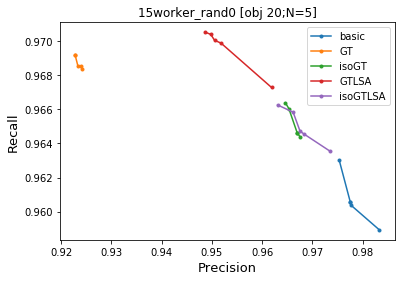

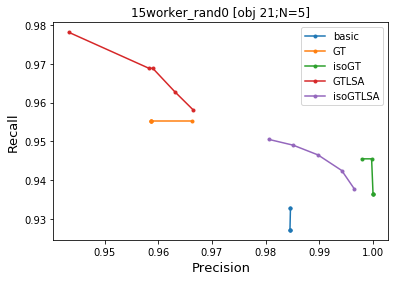

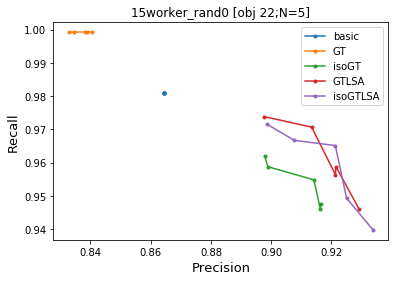

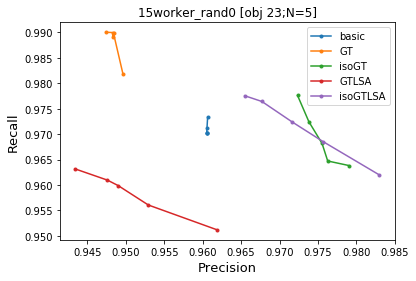

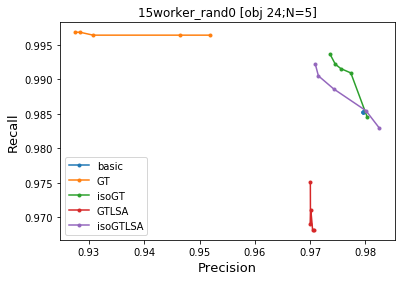

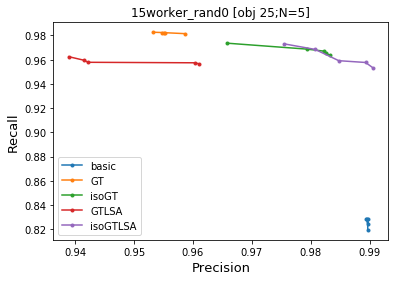

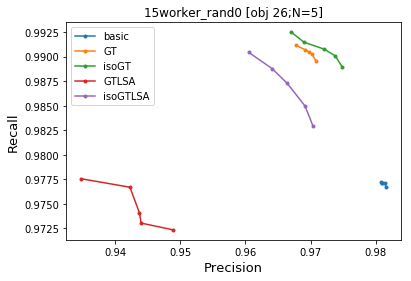

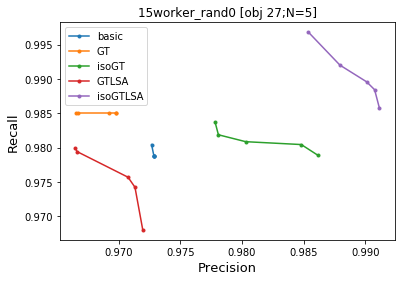

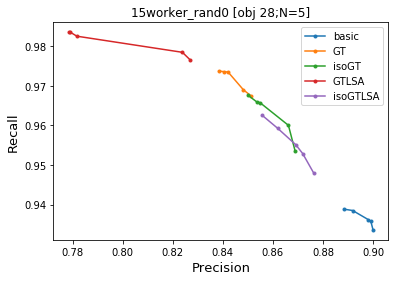

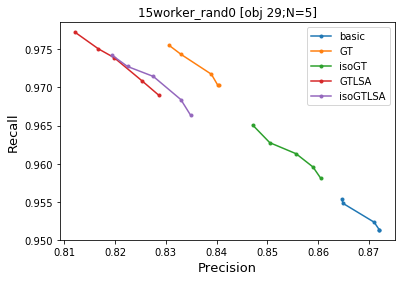

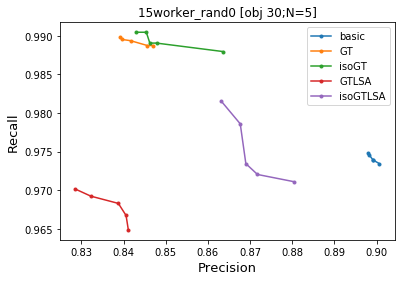

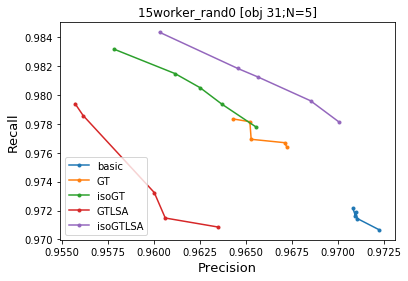

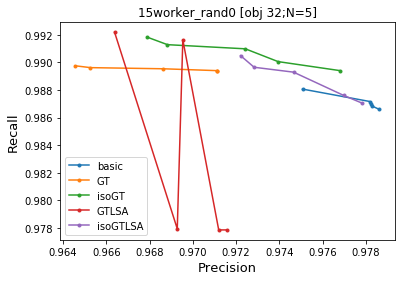

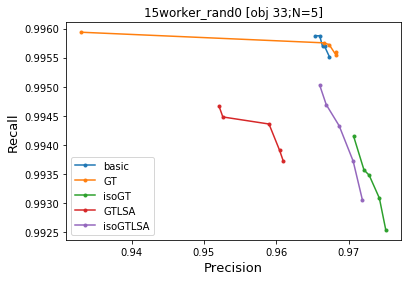

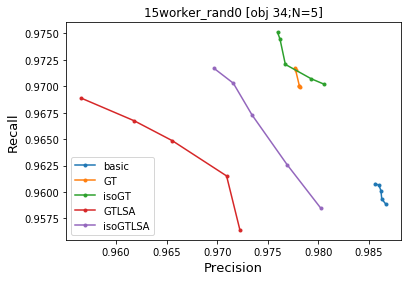

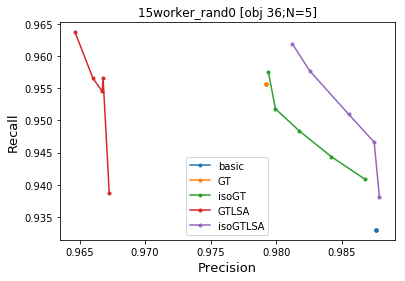

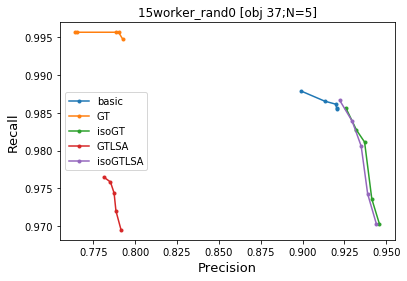

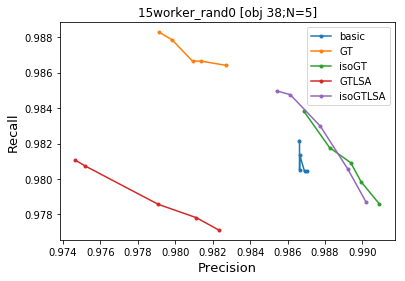

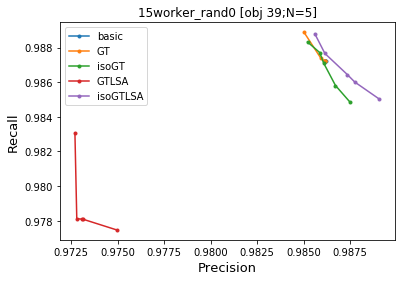

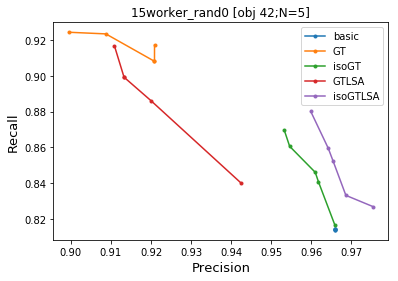

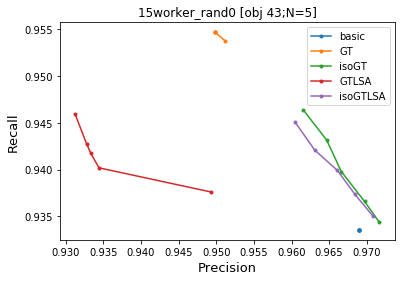

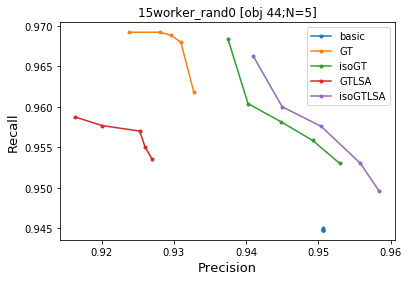

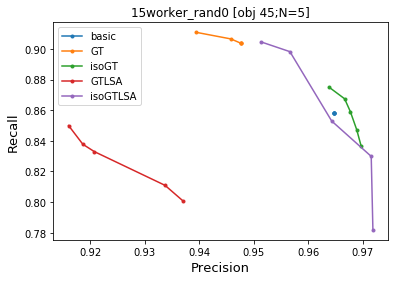

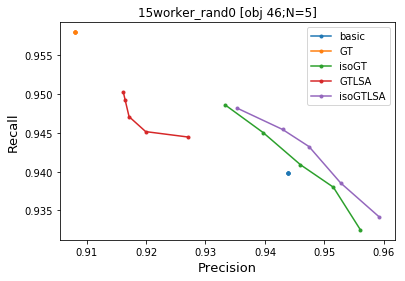

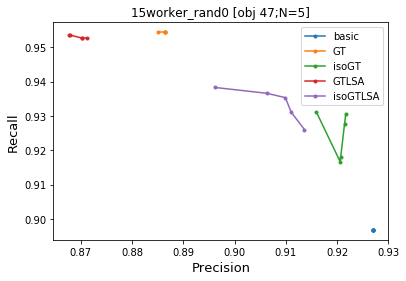

In [17]:
for i in object_lst:
    plot_PRcurve(i,15,0)

#### sometimes the basic models have identical  PRJ values for some objects, there are cases where the PRJ varies by a bit, but in general, basic model doesn't change a lot within the threshold range that we are varying, this might point to the fact that basic modesl are more robust to parameter change '

### Redo analysis with the refined data + original data , full dataset 